# 载入数据

In [2]:
import pandas as pd
df = pd.read_excel('./job_detail.xlsx')
# 将载入的数据修改为列表
df['职位详情'] = [eval(df['职位详情'][i]) for i in range(len(df['职位详情']))]
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
# 清理与输入关键词相同的词汇
def clean_self(self, self_word):
    result = []
    for temp in self:
        middle = []
        if temp is not None:
            for word in temp:
                if self_word not in word:
                    middle.append(word)
        result.append(middle)
    return result

# 制作职位类型与其他项目关系图

### 不同职位类别下的城市分布

In [20]:
import re

In [21]:
def get_job_type(search_job, df):
    # 将搜索到的Java（不区分大小写）传入待画图的数据中
    this = df[df['职位名称'].str.contains(search_job,case= False)]
    this = this.reset_index(drop = True)
#     print('数据总条数：{}'.format(len(this)))
    return this

In [22]:
# 从loc位置开始向wait表中添加职位类别为job_type的数据
def add_data(wait, this, loc, job_type):
    for i in range(len(this)):
        wait.loc[loc + i, '职位类别'] = job_type
        wait.loc[loc + i, '工作所在省份'] = this['工作所在省份'][i]
    loc += i
    return wait, loc

In [23]:
# 创建空的DataFrame对象
wait = pd.DataFrame()
# 建立两列数据设置列名
wait['职位类别'] = None
wait['工作所在省份'] = None
loc = 0
word_list = ['java', 'python', '大数据', '算法', 'php', '前端', '数据分析']
for j in range(len(word_list)):
    this = get_job_type(word_list[j], df)
    wait, loc = add_data(wait, this, loc, word_list[j])
# display(wait)

In [24]:
# 使用 replace 函数批量修改数据
wait['工作所在省份'] = wait['工作所在省份'].replace({'内蒙古自治区': '内蒙古'})
wait['工作所在省份'] = wait['工作所在省份'].replace({'宁夏回族自治区': '宁夏'})
wait['工作所在省份'] = wait['工作所在省份'].replace({'广西壮族自治区': '广西省'})
wait['工作所在省份'] = wait['工作所在省份'].replace({'新疆维吾尔自治区': '新疆'})
wait['工作所在省份'] = wait['工作所在省份'].replace({'西藏自治区': '西藏'})

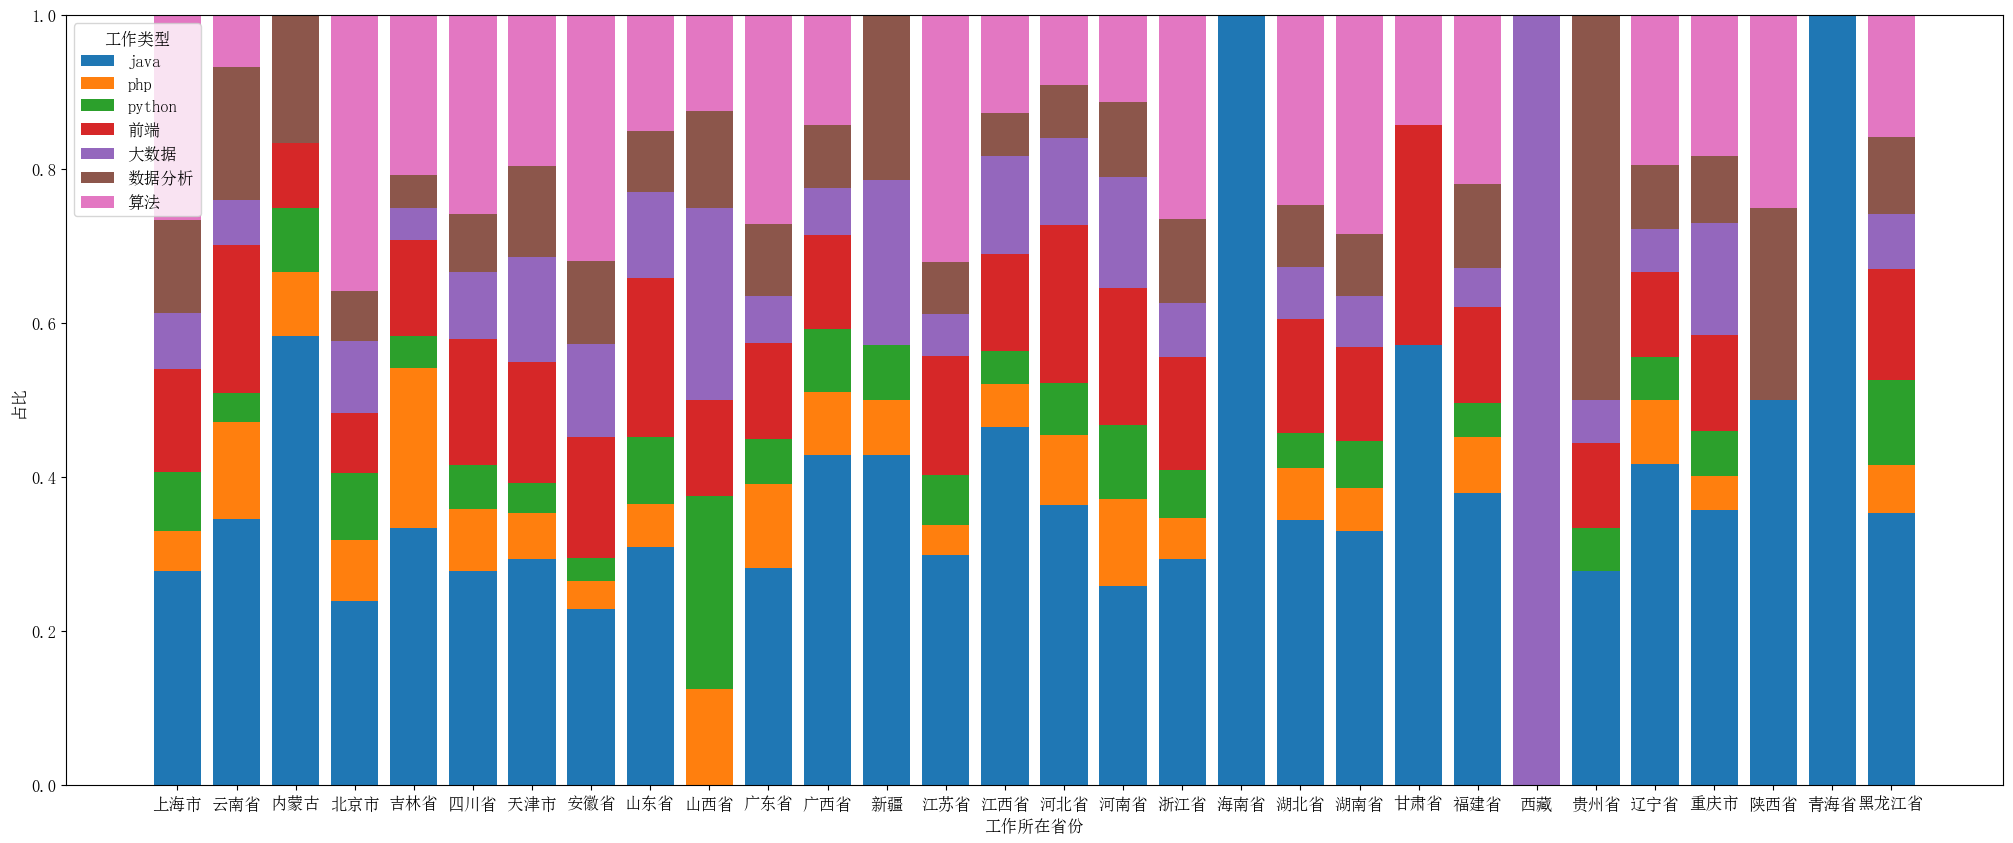

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 统计每个职位类别中各个学历要求的数量
counts = wait.groupby(['职位类别', '工作所在省份']).size().unstack()

# 计算每个学历要求在其所在分组内的百分比
totals = counts.sum(axis=1)
percentages = counts.div(counts.sum(axis=0), axis=1)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# # 绘制条形图
# fig, ax = plt.subplots(figsize=(10, 6))

categories = percentages.index
for i, category in enumerate(categories):
    ax.bar(
        percentages.columns,
        percentages.loc[category],
        bottom = percentages.iloc[:i].sum(),
        label = category
    )

ax.set_xlabel('工作所在省份')
ax.set_ylabel('占比')
ax.legend(title='工作类型')
plt.show()


## 职位类别的工作经验要求分布

In [27]:
def get_job_type(search_job, df):
    # 将搜索到的Java（不区分大小写）传入待画图的数据中
    this = df[df['职位名称'].str.contains(search_job,case= False)]
    this = this.reset_index(drop = True)
#     print('数据总条数：{}'.format(len(this)))
    return this

In [28]:
# 从loc位置开始向wait表中添加职位类别为job_type的数据
def add_data(wait, this, loc, job_type):
    for i in range(len(this)):
        wait.loc[loc + i, '职位类别'] = job_type
        wait.loc[loc + i, '工作经验要求'] = this['工作经验要求'][i]
    loc += i
    return wait, loc

In [29]:
# 创建空的DataFrame对象
wait = pd.DataFrame()
# 建立两列数据设置列名
wait['职位类别'] = None
wait['工作经验要求'] = None
loc = 0
word_list = ['java', 'python', '大数据', '算法', 'php', '前端', '数据分析']
for j in range(len(word_list)):
    this = get_job_type(word_list[j], df)
    wait, loc = add_data(wait, this, loc, word_list[j])
# display(wait)

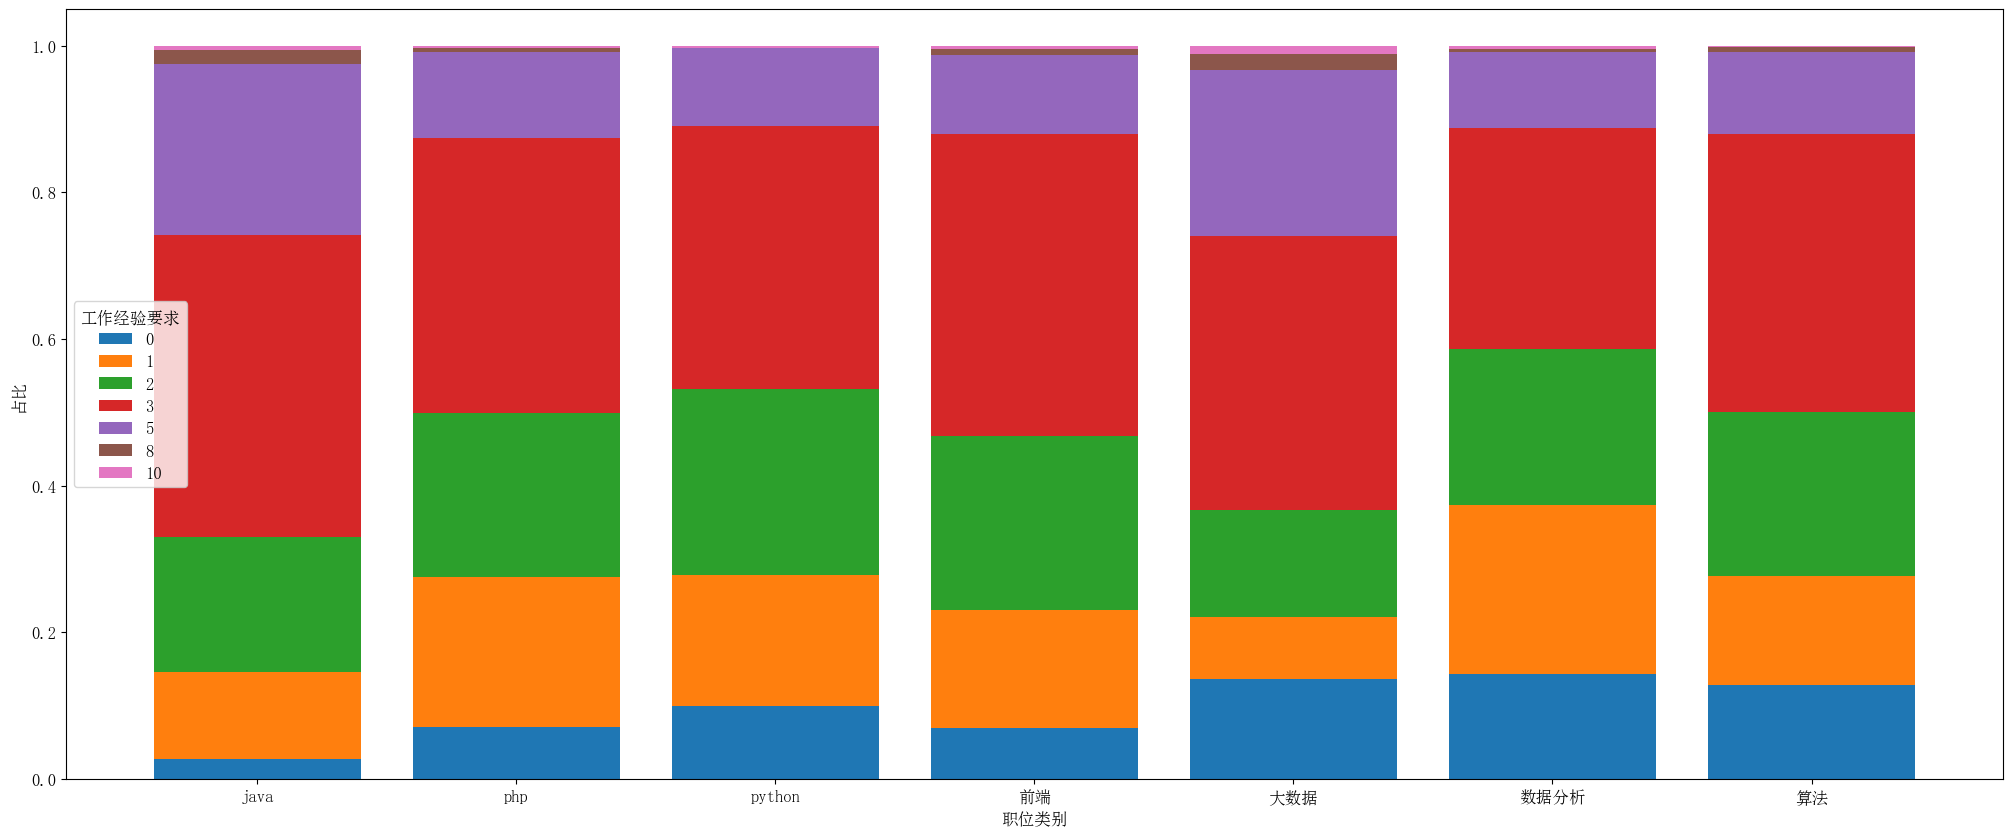

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 统计每个职位类别中各个学历要求的数量
counts = wait.groupby(['工作经验要求', '职位类别']).size().unstack()

# 计算每个学历要求在其所在分组内的百分比
totals = counts.sum(axis=1)
percentages = counts.div(counts.sum(axis=0), axis=1)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# # 绘制条形图
# fig, ax = plt.subplots(figsize=(10, 6))

categories = percentages.index
for i, category in enumerate(categories):
    ax.bar(
        percentages.columns,
        percentages.loc[category],
        bottom = percentages.iloc[:i].sum(),
        label = category
    )

ax.set_xlabel('职位类别')
ax.set_ylabel('占比')
ax.legend(title='工作经验要求')
plt.show()


## 职位类别下的公司类型占比

In [32]:
def get_job_type(search_job, df):
    # 将搜索到的Java（不区分大小写）传入待画图的数据中
    this = df[df['职位名称'].str.contains(search_job,case= False)]
    this = this.reset_index(drop = True)
#     print('数据总条数：{}'.format(len(this)))
    return this

In [33]:
# 从loc位置开始向wait表中添加职位类别为job_type的数据
def add_data(wait, this, loc, job_type):
    for i in range(len(this)):
        wait.loc[loc + i, '职位类别'] = job_type
        wait.loc[loc + i, '公司类型'] = this['公司类型'][i]
    loc += i
    return wait, loc

In [34]:
# 创建空的DataFrame对象
wait = pd.DataFrame()
# 建立两列数据设置列名
wait['职位类别'] = None
wait['公司类型'] = None
loc = 0
word_list = ['java', 'python', '大数据', '算法', 'php', '前端', '数据分析']
for j in range(len(word_list)):
    this = get_job_type(word_list[j], df)
    wait, loc = add_data(wait, this, loc, word_list[j])
# display(wait)

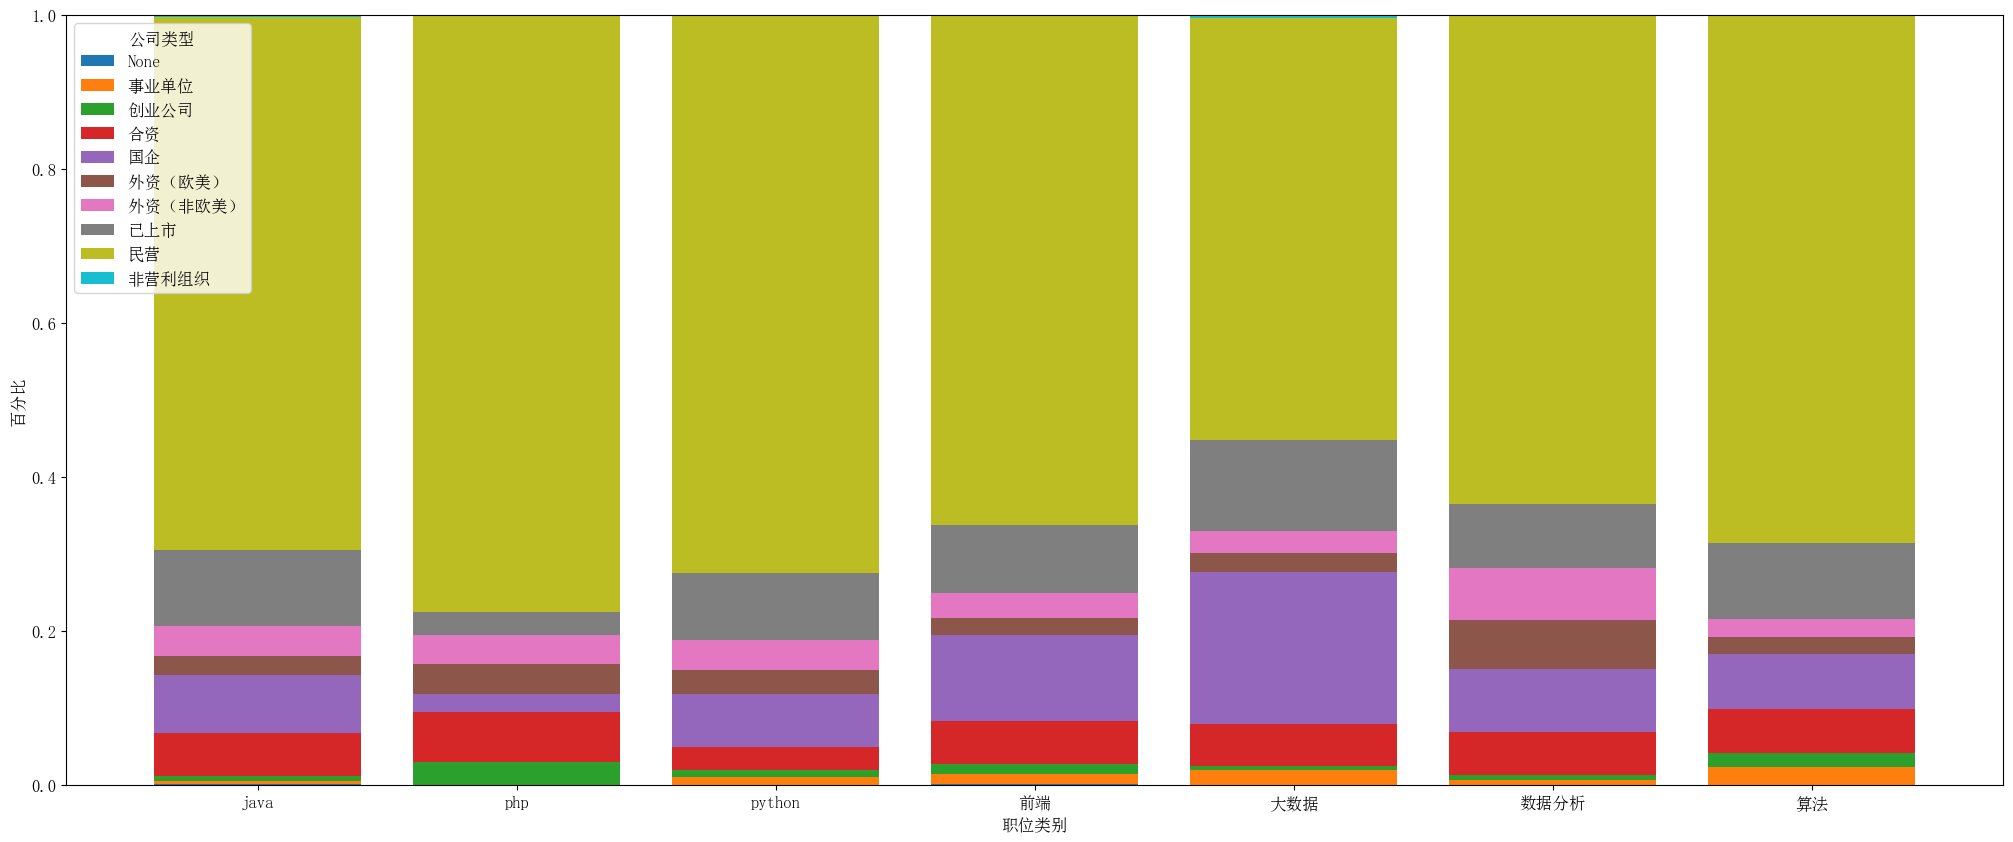

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 统计每个职位类别中各个学历要求的数量
counts = wait.groupby(['公司类型', '职位类别']).size().unstack()

# 计算每个学历要求在其所在分组内的百分比
totals = counts.sum(axis=1)
percentages = counts.div(counts.sum(axis=0), axis=1)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# # 绘制条形图
# fig, ax = plt.subplots(figsize=(10, 6))

categories = percentages.index
for i, category in enumerate(categories):
    ax.bar(
        percentages.columns,
        percentages.loc[category],
        bottom = percentages.iloc[:i].sum(),
        label = category
    )

ax.set_xlabel('职位类别')
ax.set_ylabel('百分比')
ax.legend(title='公司类型')
plt.show()
